<a href="https://colab.research.google.com/github/CharlesPrado23/Notebooks/blob/main/Semana7/Semana7.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<h2> <center> Machine Learning  <center> </h2>


      
<h3>  <center>Conceitos básicos : 
    
   
    
     Normalização dos dados 
     
     Treinamento supervisionado e não-supervisionado

     Regressão não-linear  

<h2> <center>O que é ? Aonde é aplicado ? </h2>

<h3>Machine learning is a subset of AI that uses computer algorithms to analyze data and make intelligent decisions based on what it is learned without being explicitly programmed. Machine learning algorithms are trained with large sets of data and they learn from examples. They do not follow rules-based algorithms. Machine learning is what enables machines to solve problems on their own and make accurate predictions using the provided data.</h3>

![image.png](attachment:image.png)

<h2><center> Machine Learning </h2>

In [4]:
from scipy import stats
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
import numpy as np
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

#%matplotlib inline

In [ ]:
x=np.arange(-10,11,0.1)

In [ ]:
y = 1*(x**2) + 1*x + 3

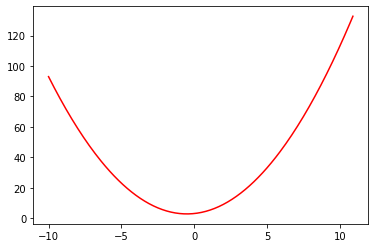

In [ ]:
plt.plot(x,y,'r')

In [ ]:
y_noise = 5 * np.random.normal(size=x.size)

In [ ]:
ydata = y + y_noise 

Text(0.5, 0, 'Independent Variable')

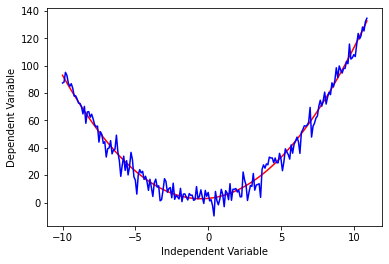

In [ ]:
plt.plot(x,y,'r')
plt.plot(x,ydata,'b')
plt.ylabel('Dependent Variable')
plt.xlabel('Independent Variable')
#plt.show()

In [ ]:
pearson_coef, p_value = stats.pearsonr(x, y)
print("The Pearson Correlation Coefficient (x,y) without noise is", pearson_coef, " with a P-value of P =", p_value) 

The Pearson Correlation Coefficient (x,y) without noise is 0.3307108027122676  with a P-value of P = 9.462588289129882e-07


In [ ]:
pearson_coef, p_value = stats.pearsonr(x, ydata)
print("The Pearson Correlation Coefficient (x,ydata) with noise is", pearson_coef, " with a P-value of P =", p_value)

The Pearson Correlation Coefficient (x,ydata) with noise is 0.321952503895229  with a P-value of P = 1.8868899022553149e-06


In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(x, ydata, test_size=0.30, random_state=0)

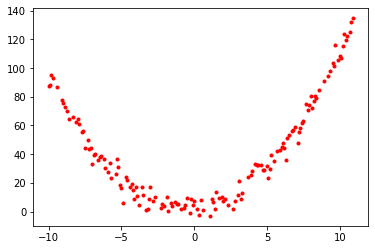

In [ ]:
plt.plot(X_train,y_train,'.r')


<h2><center> Regressão Linear - Usando a Transformação de X -- XT = (X,X^2, X^3,..,Xˆn)<h2>

In [ ]:
poly = PolynomialFeatures(degree=2)
X_T = poly.fit_transform(X_train.reshape(-1,1))
X_T[0:5]

array([[ 1.        , -0.15807423,  0.02498746],
       [ 1.        , -0.57973568,  0.33609346],
       [ 1.        , -0.25358736,  0.06430655],
       [ 1.        ,  1.123426  ,  1.26208598],
       [ 1.        ,  0.12846516,  0.0165033 ]])

In [ ]:
#lr.fit(x.reshape(-1,1),y)
lr = LinearRegression()
lr.fit(X_T,y_train)

LinearRegression()

In [ ]:
y_T = lr.predict(X_T)
y_T[0:5]

array([13.79462215, 52.67775455, 44.51655218, 14.4863248 , 17.45268698])

In [ ]:
lr.score(X_T,y_train)

0.982044341340967

<h2><center> Regressão Não-Linear - Função Quadrática <h2>

In [ ]:
def quadratic(x,a,b,c):
     y = a*(x**2) + b*x + c 
     return y

In [ ]:
from scipy.optimize import curve_fit
popt, pcov = curve_fit(quadratic, X_train, y_train)
#print the final parameters
print(" a = %f, b = %f, c = %f" % (popt[0], popt[1],popt[2]))

 a = 0.997758, b = 0.965260, c = 2.383241


In [ ]:
# build the model using train set
#popt, pcov = curve_fit(sigmoid, train_x, train_y)

# predict using test set
y_hat = quadratic(X_test, *popt)
y_hat

array([ 71.15531619,   4.44375143,  40.70534561,  83.26091172,
        88.14389643,   3.62581832,   6.48191703,   9.33596101,
         2.4157382 ,  36.690264  ,  27.2564834 ,  39.07838325,
        20.73833167,  91.88896632,   2.15677778,   2.98748162,
        99.61856799,  35.90310904,  10.63543622,  61.55734256,
        58.03019556,  66.26653117,  79.70239436,  18.24416542,
         2.24959744,  17.19920586,  11.03237761,  10.44695025,
        41.54632313,  82.67595527,   6.2060764 ,  31.06918109,
        20.45885248,   7.9751292 ,  86.30129422,  26.93150759,
        67.34971022,   7.3534444 ,  64.67684648,  17.98418478,
        93.791434  ,  55.5577966 ,   2.92898597,  23.11311659,
        85.07010313,   6.61840687,  18.78911886,  28.26746855,
        12.47108231,   3.79401382,  49.87753314,   2.48974423,
        52.21628891, 107.66745215,  77.95306841,  32.51096075,
         4.06015867,  11.63776012,  13.5736386 ,   4.34625869,
       124.72306799,   3.54782412,   5.8137011 ])

In [ ]:
print("Residual sum of squares (MSE): %f" % np.mean((y_hat - y_test) ** 2))
from sklearn.metrics import r2_score
print("R2-score: " , r2_score(y_test,y_hat) )

Residual sum of squares (MSE): 33.597804
R2-score:  0.9720104964059609


In [ ]:
y_test

array([ 72.43027587,   2.59958362,  45.21552755,  84.9652494 ,
        98.49947261,   6.18852937,   1.61046263,   4.05984897,
         1.6180589 ,  36.95725481,  20.1520577 ,  31.70595535,
        20.24767544,  99.82202022,   3.90176066,   1.85684414,
        98.044936  ,  49.1978476 ,  12.24049542,  66.42981614,
        69.52647569,  70.2599889 ,  83.55764073,  22.79771592,
        11.65994737,  13.17896216,  16.40202076,  22.30457306,
        36.06266097,  87.49717009,   3.44131185,  35.93002031,
        27.48039605,  15.41095851,  89.21833253,  29.08783398,
        70.49196915,   9.64650387,  57.91773251,  13.72570878,
        96.76984577,  57.02385083,  -9.80694461,  27.56624807,
        87.13487643,  10.96869198,   3.77258758,  30.56481267,
        14.24102687,   2.43714984,  51.75069752,   1.1439231 ,
        56.06719952, 104.85625435,  77.79517089,  19.11050389,
         9.66010177,  12.825535  ,  12.41525439,   5.83211716,
       128.31103444,  -1.7010681 ,  14.11443228])

<h2> A transformação funciona para f(x)  Polinomiais - E para outras funções não-lineares ??? </h2>

In [ ]:
def sigmoid(x, Beta_1, Beta_2):
     y = 1 / (1 + np.exp(-Beta_1*(x-Beta_2)))
     return y

In [ ]:
x=np.arange(-10,10,0.1)
Y = sigmoid(x,1,1)

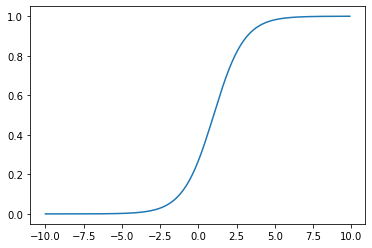

In [ ]:
plt.plot(x,Y)

<h3> Por que às vezes (ou quase sempre) preciso normalizar os dados de entrada de uma ML ? </h3>

![image.png](attachment:image.png)

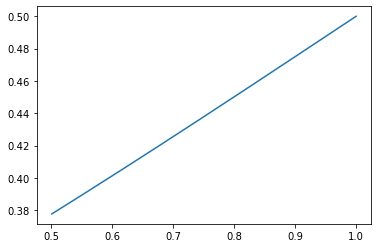

In [ ]:
x=np.arange(50,100,0.1)
x=x/np.max(x)
Y = sigmoid(x,1,1)
plt.plot(x,Y)

<h3>  <center>O que está ERRADO ???? 

      Dados de entrada precisam ser normalizados !!!! 
</h3>


In [ ]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
print(scaler.fit(x.reshape(-1,1)))
xT = scaler.transform(x.reshape(-1,1))
#xT = x/np.max(x)

StandardScaler()


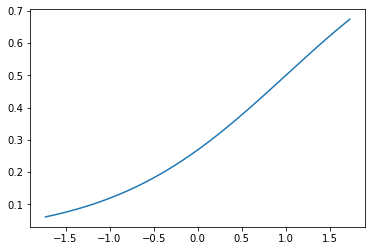

In [ ]:
Y = sigmoid(xT,1,1)
plt.plot(xT,Y)

<h3>  <center> Vetor de entrada composto por N Features 
          
      com ranges diferentes também será necessário a 
    
            Normalização !!!!
 </h3> 

In [ ]:
import pandas as pd
df = pd.read_csv('weatherHistory.csv')
df.describe()

FileNotFoundError: ignored

In [ ]:
df.head()

,Formatted Date,Summary,Precip Type,Temperature (C),Apparent Temperature (C),Humidity,Wind Speed (km/h),Wind Bearing (degrees),Visibility (km),Loud Cover,Pressure (millibars),Daily Summary
0,2006-04-01 00:00:00.000 +0200,Partly Cloudy,rain,9.472222,7.388889,0.89,14.1197,251.0,15.8263,0.0,1015.13,Partly cloudy throughout the day.
1,2006-04-01 01:00:00.000 +0200,Partly Cloudy,rain,9.355556,7.227778,0.86,14.2646,259.0,15.8263,0.0,1015.63,Partly cloudy throughout the day.
2,2006-04-01 02:00:00.000 +0200,Mostly Cloudy,rain,9.377778,9.377778,0.89,3.9284,204.0,14.9569,0.0,1015.94,Partly cloudy throughout the day.
3,2006-04-01 03:00:00.000 +0200,Partly Cloudy,rain,8.288889,5.944444,0.83,14.1036,269.0,15.8263,0.0,1016.41,Partly cloudy throughout the day.
4,2006-04-01 04:00:00.000 +0200,Mostly Cloudy,rain,8.755556,6.977778,0.83,11.0446,259.0,15.8263,0.0,1016.51,Partly cloudy throughout the day.


In [ ]:
scaler.fit(df[['Wind Speed (km/h)','Visibility (km)','Pressure (millibars)']])

StandardScaler()

In [ ]:
df[['Wind Speed (km/h)','Visibility (km)','Pressure (millibars)']] = scaler.transform(df[['Wind Speed (km/h)','Visibility (km)','Pressure (millibars)']])


In [ ]:
df.head()

,Formatted Date,Summary,Precip Type,Temperature (C),Apparent Temperature (C),Humidity,Wind Speed (km/h),Wind Bearing (degrees),Visibility (km),Loud Cover,Pressure (millibars),Daily Summary
0,2006-04-01 00:00:00.000 +0200,Partly Cloudy,rain,9.472222,7.388889,0.89,0.478635,251.0,1.306976,0.0,0.101685,Partly cloudy throughout the day.
1,2006-04-01 01:00:00.000 +0200,Partly Cloudy,rain,9.355556,7.227778,0.86,0.499594,259.0,1.306976,0.0,0.105960,Partly cloudy throughout the day.
2,2006-04-01 02:00:00.000 +0200,Mostly Cloudy,rain,9.377778,9.377778,0.89,-0.995473,204.0,1.099586,0.0,0.108610,Partly cloudy throughout the day.
3,2006-04-01 03:00:00.000 +0200,Partly Cloudy,rain,8.288889,5.944444,0.83,0.476306,269.0,1.306976,0.0,0.112628,Partly cloudy throughout the day.
4,2006-04-01 04:00:00.000 +0200,Mostly Cloudy,rain,8.755556,6.977778,0.83,0.033841,259.0,1.306976,0.0,0.113483,Partly cloudy throughout the day.


In [ ]:
df.corr()

,Temperature (C),Apparent Temperature (C),Humidity,Wind Speed (km/h),Wind Bearing (degrees),Visibility (km),Loud Cover,Pressure (millibars)
Temperature (C),1.000000,0.992629,-0.632255,0.008957,0.029988,0.392847,NaN,-0.005447
Apparent Temperature (C),0.992629,1.000000,-0.602571,-0.056650,0.029031,0.381718,NaN,-0.000219
Humidity,-0.632255,-0.602571,1.000000,-0.224951,0.000735,-0.369173,NaN,0.005454
Wind Speed (km/h),0.008957,-0.056650,-0.224951,1.000000,0.103822,0.100749,NaN,-0.049263
Wind Bearing (degrees),0.029988,0.029031,0.000735,0.103822,1.000000,0.047594,NaN,-0.011651
Visibility (km),0.392847,0.381718,-0.369173,0.100749,0.047594,1.000000,NaN,0.059818
Loud Cover,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Pressure (millibars),-0.005447,-0.000219,0.005454,-0.049263,-0.011651,0.059818,NaN,1.000000


<AxesSubplot:xlabel='Humidity', ylabel='Temperature (C)'>

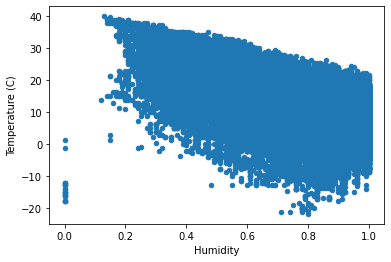

In [ ]:
df.plot(kind='scatter', x='Humidity', y='Temperature (C)')

In [ ]:
df.corr()

,Temperature (C),Apparent Temperature (C),Humidity,Wind Speed (km/h),Wind Bearing (degrees),Visibility (km),Loud Cover,Pressure (millibars)
Temperature (C),1.000000,0.992629,-0.632255,0.008957,0.029988,0.392847,NaN,-0.005447
Apparent Temperature (C),0.992629,1.000000,-0.602571,-0.056650,0.029031,0.381718,NaN,-0.000219
Humidity,-0.632255,-0.602571,1.000000,-0.224951,0.000735,-0.369173,NaN,0.005454
Wind Speed (km/h),0.008957,-0.056650,-0.224951,1.000000,0.103822,0.100749,NaN,-0.049263
Wind Bearing (degrees),0.029988,0.029031,0.000735,0.103822,1.000000,0.047594,NaN,-0.011651
Visibility (km),0.392847,0.381718,-0.369173,0.100749,0.047594,1.000000,NaN,0.059818
Loud Cover,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Pressure (millibars),-0.005447,-0.000219,0.005454,-0.049263,-0.011651,0.059818,NaN,1.000000


<h2><center> K-NN (K Nearest Neighbor) </h2>

<h3> <center>
    
    
    
•	 Amongst the simplest of all machine learning
algorithms. No eXplicit training or model.
    
•	 Can be used both for classifcaton and
regression.
    
•	 Use XIs K-Nearest Neighbors to vote on what
XIs label should be. </h3>

<h2><center> Classification Problem </h2>

<h3><center>Classify using the majority vote of the k closest training points</h3>


Screen Shot 2021-03-10 at 8.23.12 PM![image.png](attachment:image.png)

![image.png](attachment:image.png)

<h3>For regression: the value for the test example
becomes the (weighted) average of the values
of the K neighbors. </h3>

<h3> 
    
The K-NN working can be explained on the basis of the below algorithm:

Step-1: Select the number K of the neighbors

Step-2: Calculate the Euclidean distance of K number of neighbors

Step-3: Take the K nearest neighbors as per the calculated Euclidean distance.

Step-4: Among these k neighbors, count the number of the data points in each category.

Step-5: Assign the new data points to that category for which the number of the neighbor is maximum.

Step-6: Our model is ready.</h3>

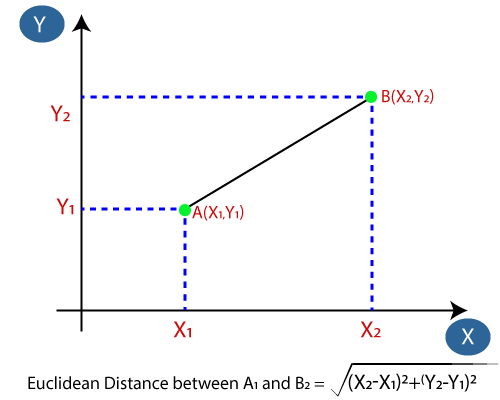

<h3><center>Diagrama de Voronoi<h3>

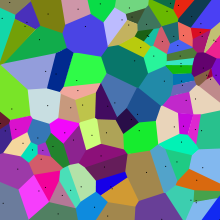

<h2> <center> Algumas Métricas para problemas de Classificação </h2> 

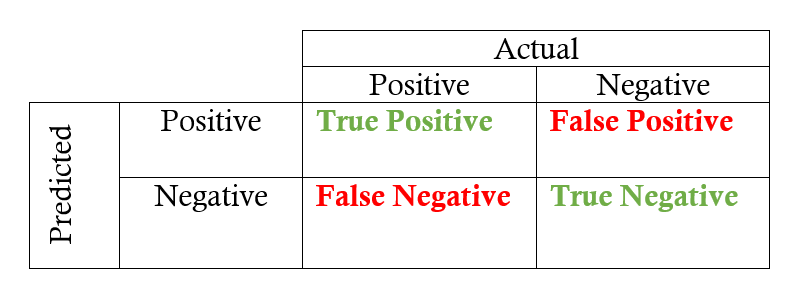

<h2> <center> Accuracy = (TP+TN)/(TP+FP+FN+TN) <h2>

<h2> <center> Precision = (TP)/(TP+FP)<h2>

<h2> <center> Recall = (TP)/(TP+FN) <h2>

In [ ]:
df2 = pd.read_csv('dataClean.csv')

In [ ]:
from sklearn import neighbors

In [ ]:
n_neighbors = 10
knn = neighbors.KNeighborsRegressor(n_neighbors, weights='distance')
X = df2[['Duration']]
y = df2[['Calories']]

In [ ]:
T = np.array(60)
y_ = knn.fit(X, y).predict(X)

In [ ]:
y_[0:5]

array([[310.60704225],
       [310.60704225],
       [310.60704225],
       [280.90870968],
       [280.90870968]])

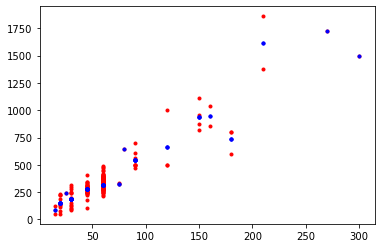

In [ ]:
plt.plot(X,y,'.r')
plt.plot(X,y_,'.b')

In [ ]:
print("R2-score: " , r2_score(y,y_) )

R2-score:  0.916801125401288


In [ ]:
from sklearn import datasets

In [ ]:
#Load dataset
data = datasets.load_wine()
data

{'data': array([[1.423e+01, 1.710e+00, 2.430e+00, ..., 1.040e+00, 3.920e+00,
         1.065e+03],
        [1.320e+01, 1.780e+00, 2.140e+00, ..., 1.050e+00, 3.400e+00,
         1.050e+03],
        [1.316e+01, 2.360e+00, 2.670e+00, ..., 1.030e+00, 3.170e+00,
         1.185e+03],
        ...,
        [1.327e+01, 4.280e+00, 2.260e+00, ..., 5.900e-01, 1.560e+00,
         8.350e+02],
        [1.317e+01, 2.590e+00, 2.370e+00, ..., 6.000e-01, 1.620e+00,
         8.400e+02],
        [1.413e+01, 4.100e+00, 2.740e+00, ..., 6.100e-01, 1.600e+00,
         5.600e+02]]),
 'target': array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1,
        1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
        1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
        1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1

In [ ]:
df_data = pd.DataFrame(data= np.c_[data['data'], data['target']],
                     columns= data['feature_names'] + ['target'])

In [ ]:
df_data.head()

,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline,target
0,14.23,1.71,2.43,15.6,127.0,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065.0,0.0
1,13.20,1.78,2.14,11.2,100.0,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050.0,0.0
2,13.16,2.36,2.67,18.6,101.0,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185.0,0.0
3,14.37,1.95,2.50,16.8,113.0,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480.0,0.0
4,13.24,2.59,2.87,21.0,118.0,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735.0,0.0


In [ ]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(wine.data)
wine_T = scaler.transform(wine.data)
#wine_T = wine.data

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(wine_T, wine.target, test_size=0.2,random_state=20)

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors=3)

In [ ]:
knn.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=3)

In [ ]:
y_pred = knn.predict(X_test)
y_pred

array([1, 2, 0, 1, 1, 1, 2, 1, 1, 2, 0, 2, 1, 1, 0, 1, 1, 0, 0, 2, 2, 0,
       1, 0, 2, 1, 0, 2, 1, 1, 1, 1, 2, 1, 0, 0])

In [ ]:
from sklearn.metrics import r2_score
from sklearn import metrics
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

Accuracy: 1.0


In [ ]:
y_test

array([1, 2, 0, 1, 1, 1, 2, 1, 1, 2, 0, 2, 1, 1, 0, 1, 1, 0, 0, 2, 2, 0,
       1, 0, 2, 1, 0, 2, 1, 1, 1, 1, 2, 1, 0, 0])

In [ ]:
from sklearn.model_selection import cross_val_score
scores = cross_val_score(knn, wine_T, wine.target, cv=10)
scores

array([0.94444444, 0.94444444, 0.94444444, 0.94444444, 1.        ,
       0.94444444, 1.        , 1.        , 0.88235294, 0.94117647])

In [ ]:
print("%0.2f accuracy with a standard deviation of %0.2f" % (scores.mean(), scores.std()))

0.95 accuracy with a standard deviation of 0.03


<h2><center> Decision Tree </h2>
   
<h3><center>  Tree-like model of decisions </h3>   
    
    
    

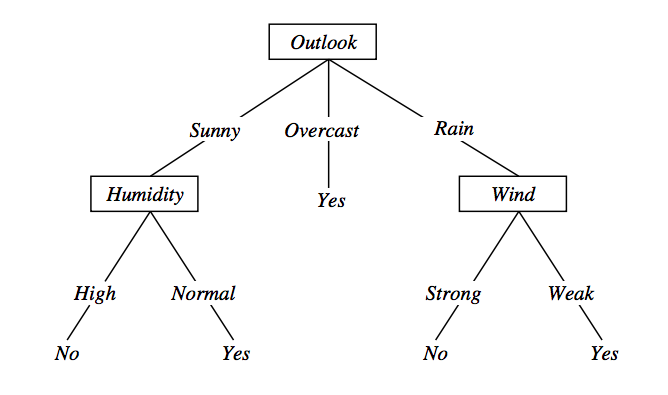

<h2><center>Representação de uma árvore de decisão</h2> 
    
<h3>
    
Cada nó interno testa um atributo
    
Cada ramo corresponde ao valor do atributo
    
Cada nó folha atribui uma classificação
</h3>    

<h2><center>  Uso de árvores de decisão  </h2>
    
<h3>
    
Instâncias que podem ser descritas por atributos {pares de valores}

A função de destino tem valor discreto

Hipótese disjuntiva pode ser necessária

Dados de treinamento possivelmente ruidosos    
    
 </h3>   

<h2><center>  Algumas aplicações  </h2>
    
<h3>
    
Equipamento ou diagnóstico médico
    
Análise de risco de crédito
    
Modelagem de preferências de programação de calendário   
    
 </h3>   

<h3>

Loop principal:
    

1. A <- o melhor "atributo" de decisão para o próximo nó

        
2. Atribua A como atributo de decisão para o nó

        
3. Para cada valor de A, crie um novo nó abaixo 
        
        
4. Classifique os exemplos de treinamento para nós folha

        
5. Se os exemplos de treinamento forem perfeitamente classificados, então
STOP, senão iterar sobre o novo nó folha
        
        
</h3>        

<h2> <center> Como definir os melhores atributos  e por que ???</h2> 

<h3> <center> Entropia dos dados </h3>
     

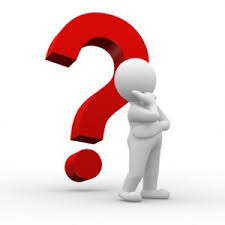

In [5]:
from sklearn.model_selection import train_test_split

In [6]:
df_social = pd.read_csv('/content/Social_Network_Ads.csv')
df_social.head()

,User ID,Gender,Age,EstimatedSalary,Purchased
0,15624510,Male,19,19000,0
1,15810944,Male,35,20000,0
2,15668575,Female,26,43000,0
3,15603246,Female,27,57000,0
4,15804002,Male,19,76000,0


In [7]:
df_social.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 5 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   User ID          400 non-null    int64 
 1   Gender           400 non-null    object
 2   Age              400 non-null    int64 
 3   EstimatedSalary  400 non-null    int64 
 4   Purchased        400 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 15.8+ KB


In [8]:
from sklearn import preprocessing
le_sex = preprocessing.LabelEncoder()
le_sex.fit(['Male','Female'])
df_social[['Gender']] = le_sex.transform(df_social.Gender) 

In [9]:
df_social.head()


,User ID,Gender,Age,EstimatedSalary,Purchased
0,15624510,1,19,19000,0
1,15810944,1,35,20000,0
2,15668575,0,26,43000,0
3,15603246,0,27,57000,0
4,15804002,1,19,76000,0


In [10]:
X=df_social[['Age','EstimatedSalary']]

In [11]:
y = df_social.Purchased


In [12]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1)

In [13]:
from sklearn.tree import DecisionTreeClassifier, plot_tree

In [14]:
dTree = DecisionTreeClassifier(criterion="entropy", max_depth = 4)

In [15]:
dTree = dTree.fit(X_train,y_train)

In [16]:
yhat = dTree.predict(X_test)
yhat

array([0, 0, 1, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 1, 1, 1, 0, 0, 1, 0, 1,
       1, 1, 1, 0, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0,
       1, 1, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 1, 1, 0, 0, 1, 0, 1, 1,
       0, 0, 1, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0,
       1, 0, 1, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 1, 0, 1, 1, 1, 1, 1,
       0, 0, 0, 0, 0, 1, 0, 0, 0, 1])

In [17]:
from sklearn.metrics import r2_score
from sklearn import metrics
print("Accuracy:",metrics.accuracy_score(y_test, yhat))

Accuracy: 0.8666666666666667


[Text(427.5978260869565, 733.86, 'X[1] <= 89500.0\nentropy = 0.924\nsamples = 280\nvalue = [185, 95]'),
 Text(200.15217391304347, 570.78, 'X[0] <= 43.5\nentropy = 0.69\nsamples = 222\nvalue = [181, 41]'),
 Text(72.78260869565217, 407.70000000000005, 'X[0] <= 36.5\nentropy = 0.186\nsamples = 177\nvalue = [172, 5]'),
 Text(36.391304347826086, 244.62, 'entropy = 0.0\nsamples = 119\nvalue = [119, 0]'),
 Text(109.17391304347825, 244.62, 'X[1] <= 67500.0\nentropy = 0.424\nsamples = 58\nvalue = [53, 5]'),
 Text(72.78260869565217, 81.54000000000008, 'entropy = 0.0\nsamples = 29\nvalue = [29, 0]'),
 Text(145.56521739130434, 81.54000000000008, 'entropy = 0.663\nsamples = 29\nvalue = [24, 5]'),
 Text(327.52173913043475, 407.70000000000005, 'X[1] <= 41500.0\nentropy = 0.722\nsamples = 45\nvalue = [9, 36]'),
 Text(254.7391304347826, 244.62, 'X[1] <= 22500.0\nentropy = 0.25\nsamples = 24\nvalue = [1, 23]'),
 Text(218.3478260869565, 81.54000000000008, 'entropy = 0.918\nsamples = 3\nvalue = [1, 2]'),


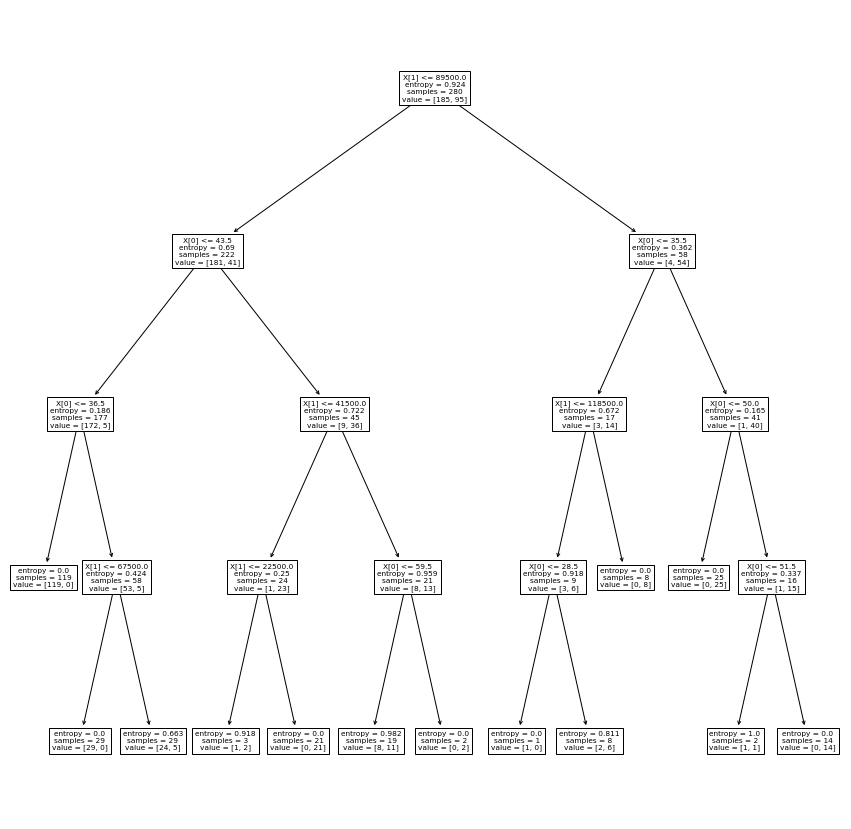

In [18]:
plt.figure(figsize=(15,15))
plot_tree(dTree)

In [19]:
# pip install graphviz
import graphviz as grp
from sklearn import tree

dot_data = tree.export_graphviz(dTree, out_file=None) 
graph = grp.Source(dot_data) 
graph.render("Social") 

'Social.pdf'

In [20]:
#!conda install -c conda-forge pydotplus -y
#!conda install -c conda-forge python-graphviz -y
from  io import StringIO
import pydotplus
import matplotlib.image as mpimg
from sklearn import tree
%matplotlib inline 

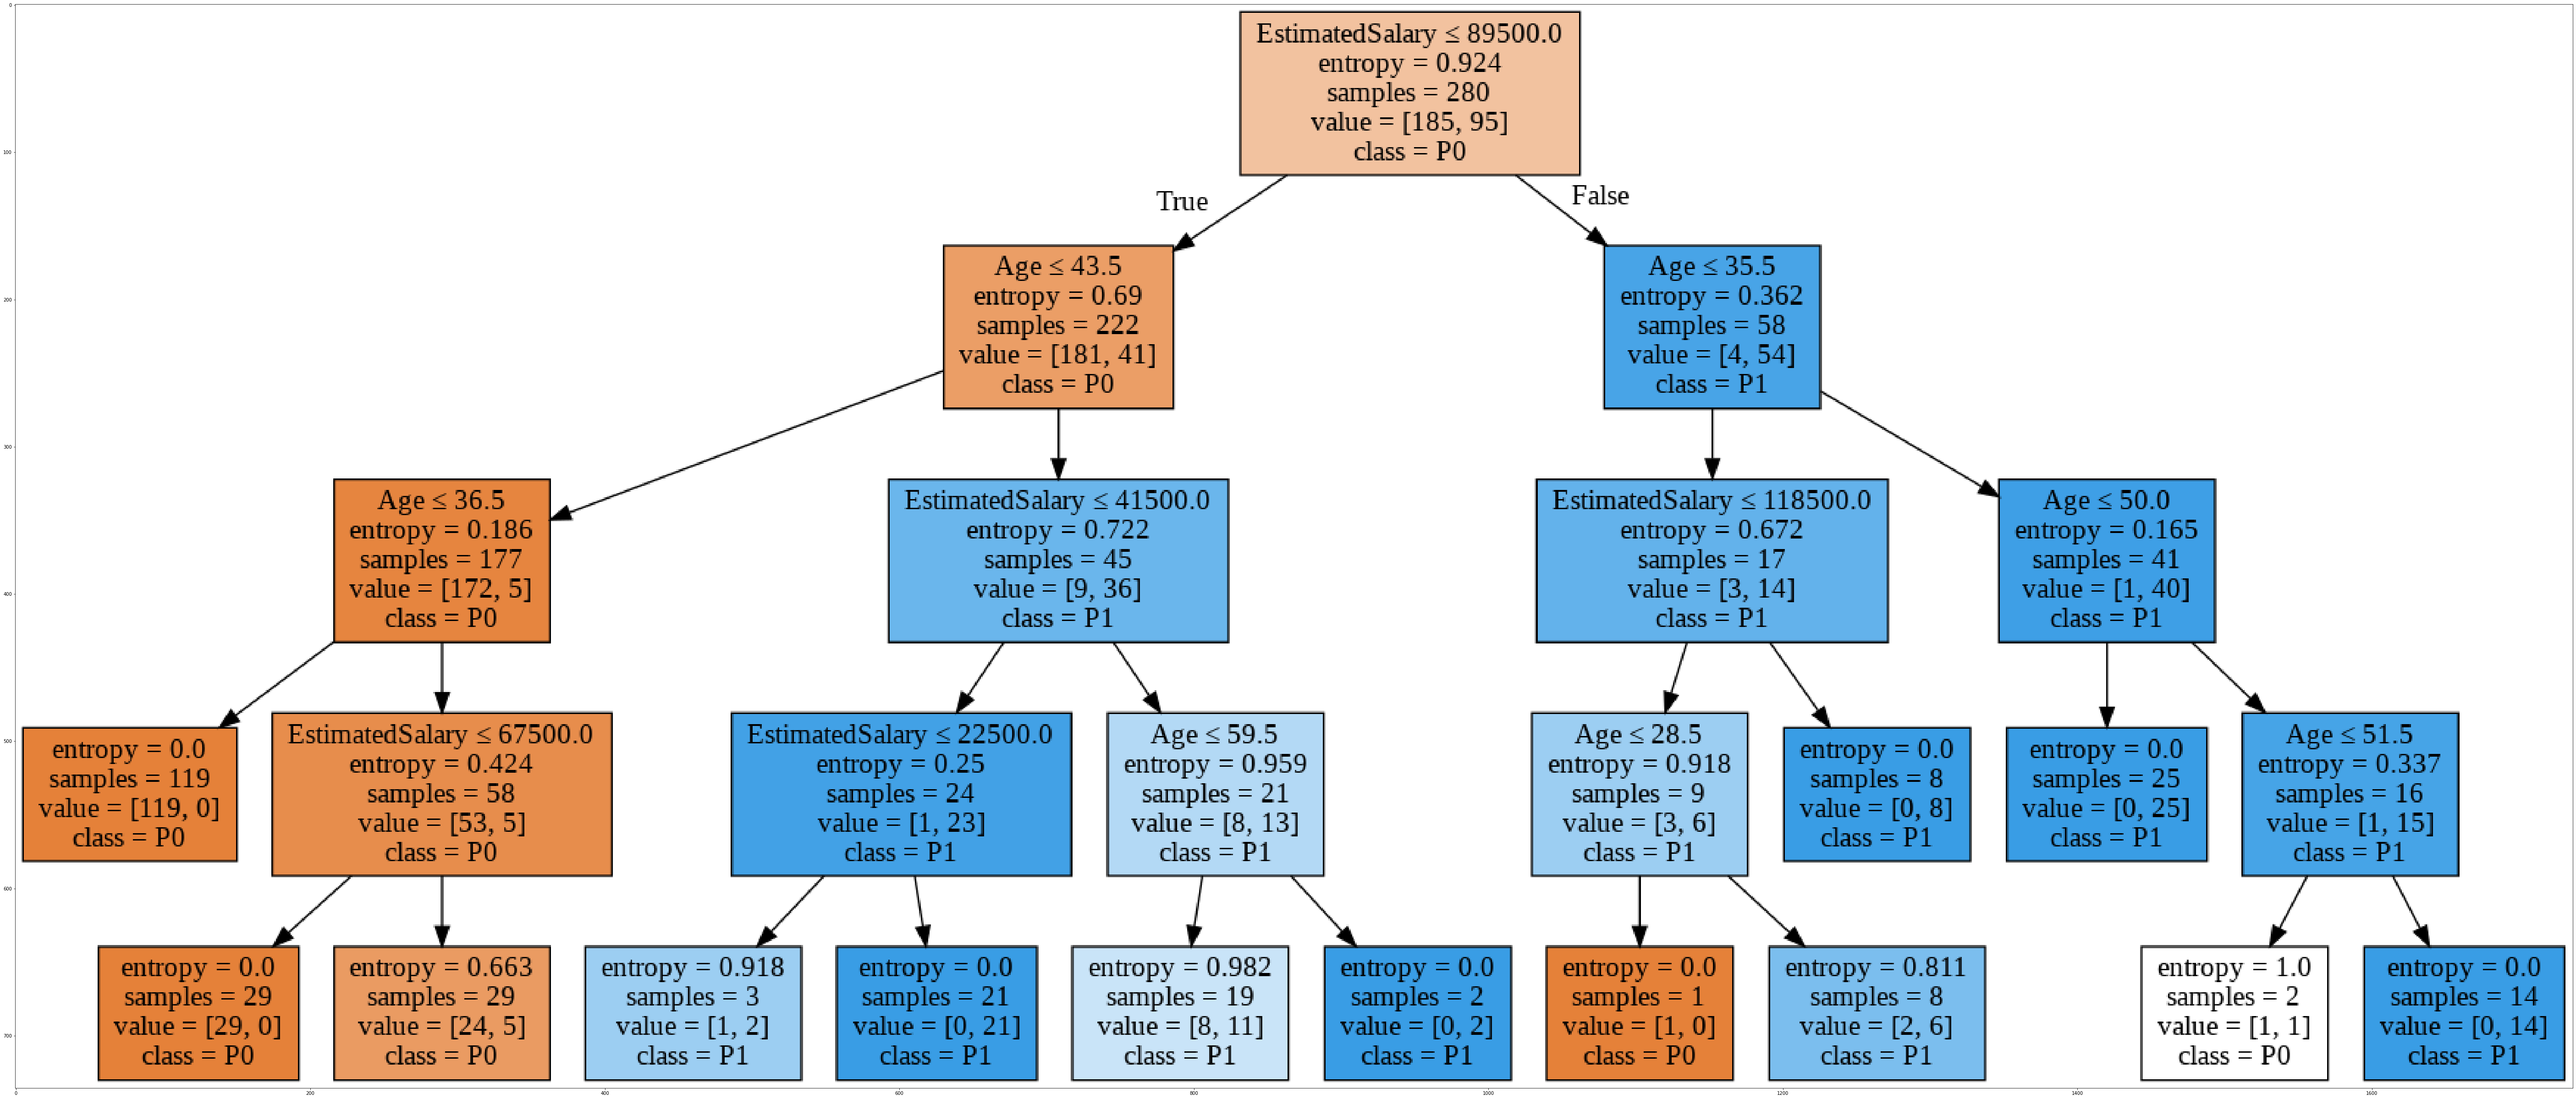

In [21]:
dot_data = StringIO()
filename = "Purchasetree.png"
featureNames = X.columns[0:3]
out=tree.export_graphviz(dTree,feature_names=featureNames, out_file=dot_data, class_names= ['P0','P1'], filled=True,  special_characters=True,rotate=False)  
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  
graph.write_png(filename)
img = mpimg.imread(filename)
plt.figure(figsize=(100, 200))
plt.imshow(img,interpolation='nearest')

In [22]:
featureNames

Index(['Age', 'EstimatedSalary'], dtype='object')

In [23]:
df_social.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 5 columns):
 #   Column           Non-Null Count  Dtype
---  ------           --------------  -----
 0   User ID          400 non-null    int64
 1   Gender           400 non-null    int64
 2   Age              400 non-null    int64
 3   EstimatedSalary  400 non-null    int64
 4   Purchased        400 non-null    int64
dtypes: int64(5)
memory usage: 15.8 KB


**REGRESSÃO LOGÍSTICA**

A regressão logística é uma técnica estatística que tem como objetivo produzir, a partir de um conjunto de observações, um modelo que permita a predição de valores tomados por uma variável categórica, frequentemente binária, a partir de uma série de variáveis explicativas contínuas e/ou binárias. (Ref.: Logistic Regression: Statnotes, from North Carolina State University, Public Administration Program) 

$
{\displaystyle \operatorname {logit} (p_{i})=\ln \left({\frac {p_{i}}{1-p_{i}}}\right)=\beta _{0}+\beta _{1}x_{1,i}+\cdots +\beta _{k}x_{k,i}.}
$

A regressão logística é utilizada em áreas como as seguintes:

1. Em medicina, permite por exemplo determinar os factores que caracterizam um grupo de indivíduos doentes em relação a indivíduos sãos.

2. No domínio dos seguros, permite encontrar fracções da clientela que sejam sensíveis a determinada política securitária em relação a um dado risco particular.

3. Em instituições financeiras, pode detectar os grupos de risco para a subscrição de um crédito.

4. Em econometria, permite explicar uma variável discreta, como por exemplo as intenções de voto eleitorais.





$$
ProbabilityOfaClass_1 =  P(Y=1|X) = \sigma({\theta^TX}) = \frac{e^{\theta^TX}}{1+e^{\theta^TX}} 
$$

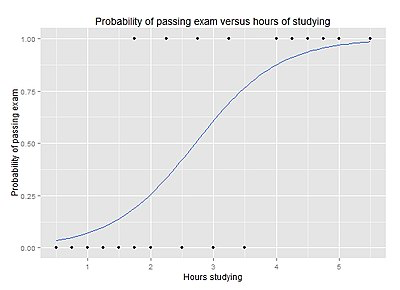

In [ ]:
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
import pandas as pd
scaler = StandardScaler()

In [ ]:
df_social = pd.read_csv('/content/Social_Network_Ads.csv')
df_social.head()

,User ID,Gender,Age,EstimatedSalary,Purchased
0,15624510,Male,19,19000,0
1,15810944,Male,35,20000,0
2,15668575,Female,26,43000,0
3,15603246,Female,27,57000,0
4,15804002,Male,19,76000,0


In [ ]:
X=df_social[['Age','EstimatedSalary']]

In [ ]:
y = df_social.Purchased


In [ ]:
scaler.fit(X)
X_T = scaler.transform(X)


In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split( X_T, y, test_size=0.2, random_state=4)
print ('Train set:', X_train.shape,  y_train.shape)
print ('Test set:', X_test.shape,  y_test.shape)

Train set: (320, 2) (320,)
Test set: (80, 2) (80,)


In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix
LR = LogisticRegression(C=0.01, solver='liblinear').fit(X_train,y_train)
LR

LogisticRegression(C=0.01, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='liblinear', tol=0.0001, verbose=0,
                   warm_start=False)

In [ ]:
yhat = LR.predict(X_test)
yhat

array([0, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0,
       0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 1, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0,
       0, 0, 1, 1, 0, 1, 0, 1, 1, 0, 0, 0, 0, 1])

In [ ]:
from sklearn.metrics import r2_score
from sklearn import metrics
print("Accuracy:",metrics.accuracy_score(y_test, yhat))

Accuracy: 0.8875


In [ ]:
from sklearn.metrics import jaccard_score
jaccard_score(y_test, yhat,pos_label=0)

0.8571428571428571

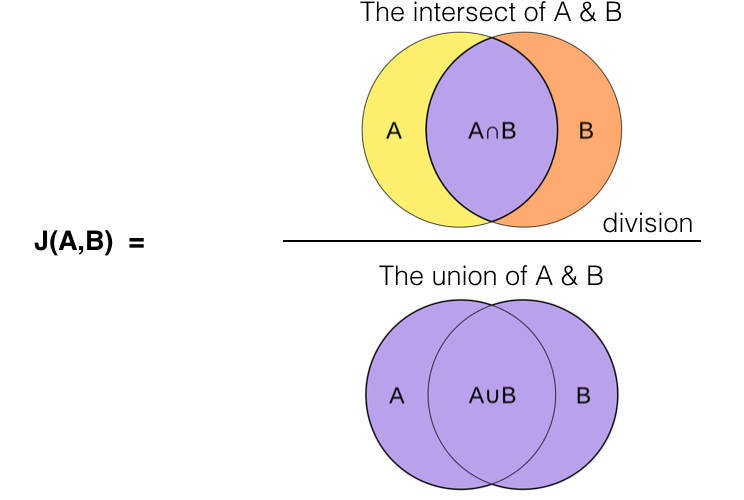

### <CENTER> **SUPPORT VECTOR MACHINE (SVM)** ###





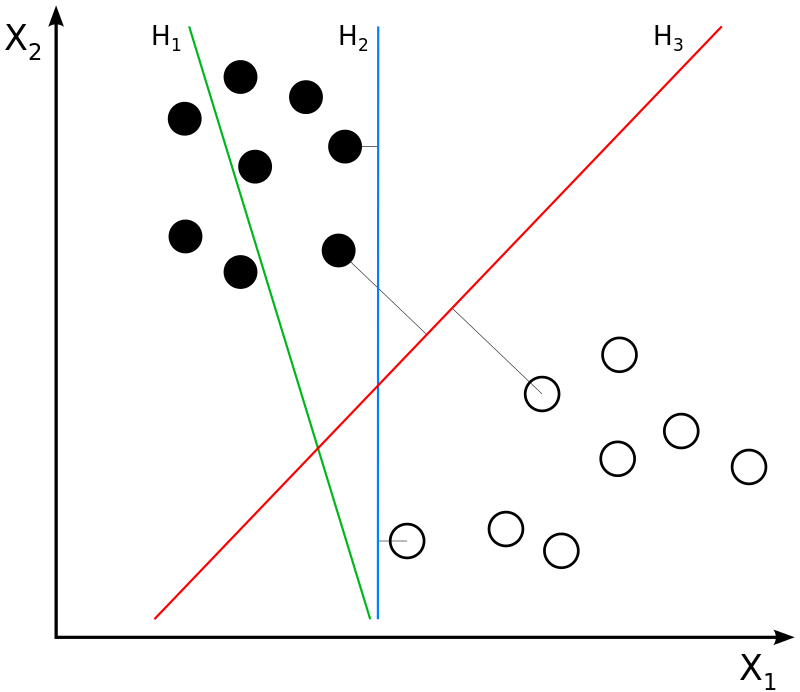

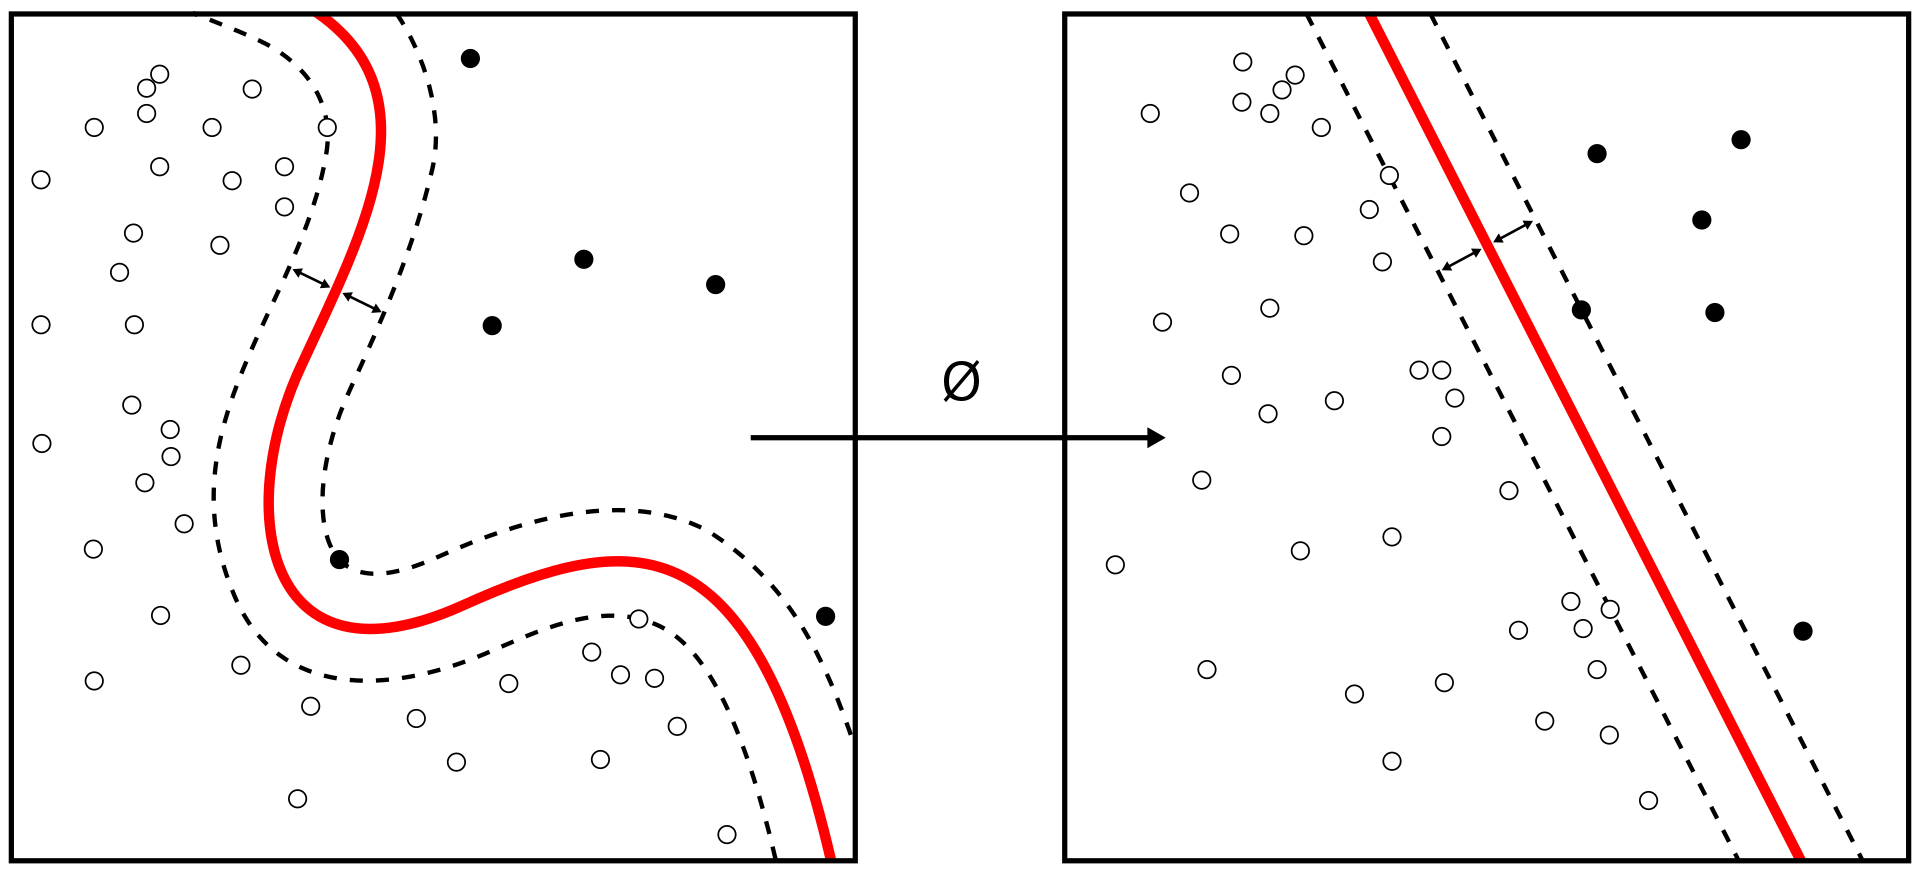

In [ ]:
from sklearn import svm
clf = svm.SVC(kernel='rbf')
clf.fit(X_train, y_train) 

SVC(C=1.0, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='rbf',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

In [ ]:
yhat = clf.predict(X_test)
yhat 

array([0, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0,
       1, 0, 0, 0, 1, 1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 1, 1, 1, 0, 0, 0, 0,
       0, 0, 0, 1, 0, 1, 0, 1, 1, 0, 0, 0, 0, 1])

In [ ]:
from sklearn.metrics import f1_score
f1_score(y_test, yhat, average='weighted') 

0.9269450800915333

In [ ]:
print("Accuracy:",metrics.accuracy_score(y_test, yhat))

Accuracy: 0.925


In [ ]:
from sklearn.metrics import classification_report, confusion_matrix
import itertools

In [ ]:
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

              precision    recall  f1-score   support

           0       0.98      0.92      0.95        59
           1       0.80      0.95      0.87        21

    accuracy                           0.93        80
   macro avg       0.89      0.93      0.91        80
weighted avg       0.93      0.93      0.93        80

Confusion matrix, without normalization
[[20  1]
 [ 5 54]]


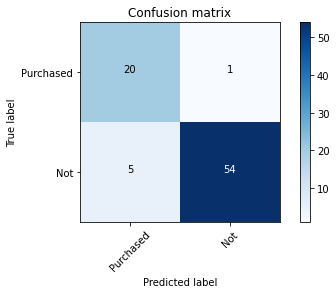

In [ ]:
cnf_matrix = confusion_matrix(y_test, yhat, labels=[1,0])
np.set_printoptions(precision=2)

print (classification_report(y_test, yhat))

# Plot non-normalized confusion matrix
plt.figure()
plot_confusion_matrix(cnf_matrix, classes=['Purchased','Not'],normalize= False,  title='Confusion matrix')